In [8]:
import sqlite3
import os.path
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# %matplot inline

db_path = os.path.join(r'\\vntscex.local\DFS\3BC-Share$_Mobileye_Data\Data\Data Integration',
                           'ituran_synchromatics_data.sqlite')

shp_path = os.path.join(r'\\vntscex.local\DFS\3BC-Share$_Mobileye_Data\Data\Routes',
                           'Downtown_DASH_Routes.shp')

table = 'hotspot_data_product'
conn = sqlite3.connect(db_path)

In [10]:
cur = conn.cursor()
df = pd.read_sql_query("SELECT * FROM " + table, conn)

summary = df.describe(percentiles=[])
print(table + '\n')
print("Dimensions:" + str(df.shape))
print(summary)


hotspot_data_product

Dimensions:(42459, 10)
           route_id     driver_id    vehicle_id    bus_number      latitude  \
count  42459.000000  42459.000000  42459.000000  42459.000000  42459.000000   
mean     296.654184   2822.685438   1571.603099  15335.433854     34.054397   
std        8.534774   2329.353570    426.942827    367.391740      0.005478   
min      296.000000    704.000000    324.000000  12311.000000     34.018331   
50%      296.000000   2014.000000   1614.000000  15327.000000     34.053953   
max      408.000000  11959.000000   3804.000000  17310.000000     34.067246   

          longitude  
count  42459.000000  
mean    -118.247496  
std        0.008023  
min     -118.291508  
50%     -118.248656  
max     -118.231368  


In [11]:
rte = gpd.read_file(shp_path)
rte.head

<bound method NDFrame.head of    ID  RouteID RouteName RouteNameS  Region     RegionType  TOOLTIP  \
0   1      146   Route A          A       6  Downtown Dash  Route A   
1   2       95   Route B          B       6  Downtown Dash  Route B   
2   3      145   Route D          D       6  Downtown Dash  Route D   
3   4       96   Route E          E       6  Downtown Dash  Route E   
4   5     1202   Route F          F       6  Downtown Dash  Route F   

                                             NLA_URL  \
0  http://www.ladottransit.com/dash/?nla_win=p,75,75   
1  http://www.ladottransit.com/dash/?nla_win=p,75,75   
2  http://www.ladottransit.com/dash/?nla_win=p,75,75   
3  http://www.ladottransit.com/dash/?nla_win=p,75,75   
4  http://www.ladottransit.com/dash/?nla_win=p,75,75   

                                            geometry  
0  LINESTRING (-118.2375989995559 34.045333999948...  
1  LINESTRING (-118.2363916923868 34.066925367928...  
2  LINESTRING (-118.2678869997303 34.0318

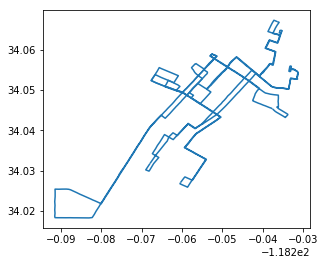

In [12]:
rte.plot()